## Context:

LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

(1) Personal Loan
(2) EMI Free Loan
(3) Personal Overdraft
(4) Advance Salary Loan
This case study will focus on the underwriting process behind Personal Loan only

## Problem Statement:

Given a set of attributes for an Individual, determine if a credit line should be extended to them. If so, what should the repayment terms be in business recommendations?

## Importing important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## loading the Dataset

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921
To: /content/logistic_regression.csv?1651045921
100% 100M/100M [00:00<00:00, 129MB/s] 


In [ ]:
df = pd.read_csv("logistic_regression.csv?1651045921")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


## checking the shape of the data

In [ ]:
df.shape

(396030, 27)

The dataset comprises of 396030 records(rows) and 27 features (columns)

## statistics summary of dataset

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## univariant Analysis

In [ ]:
num_col = df.select_dtypes('float64').columns.tolist()


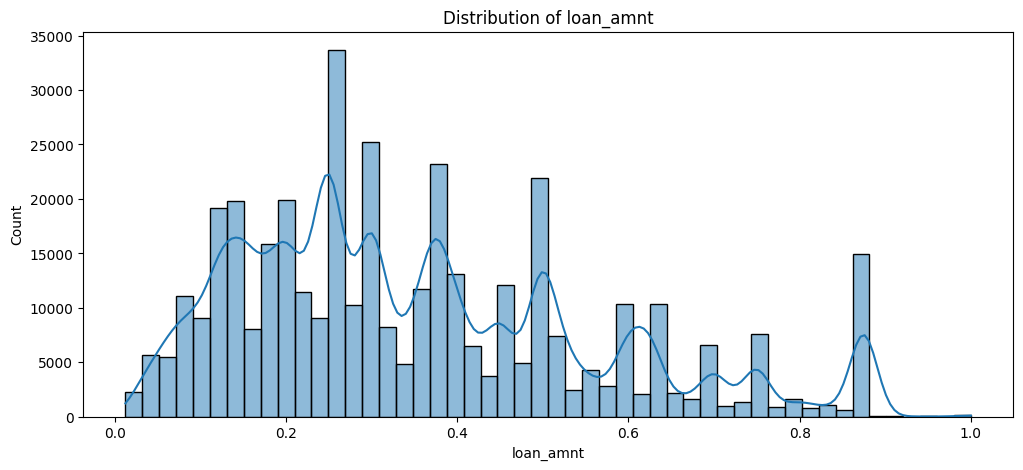

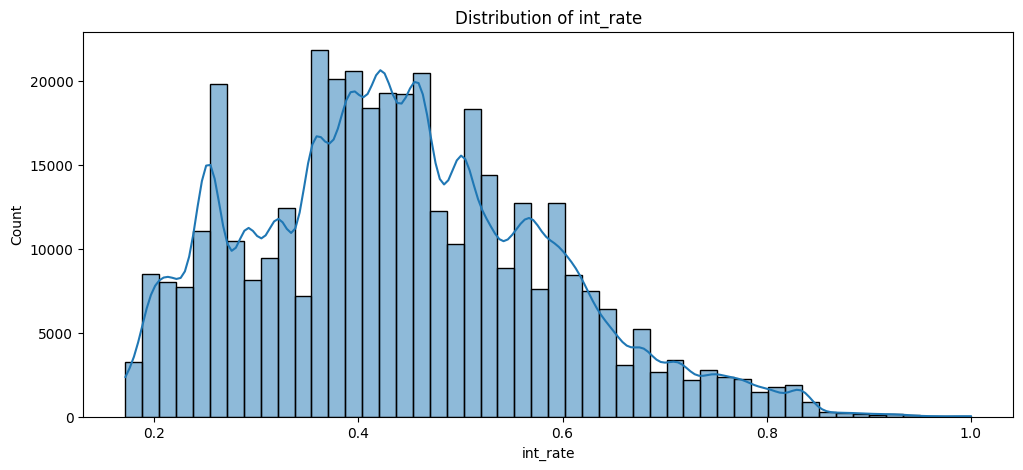

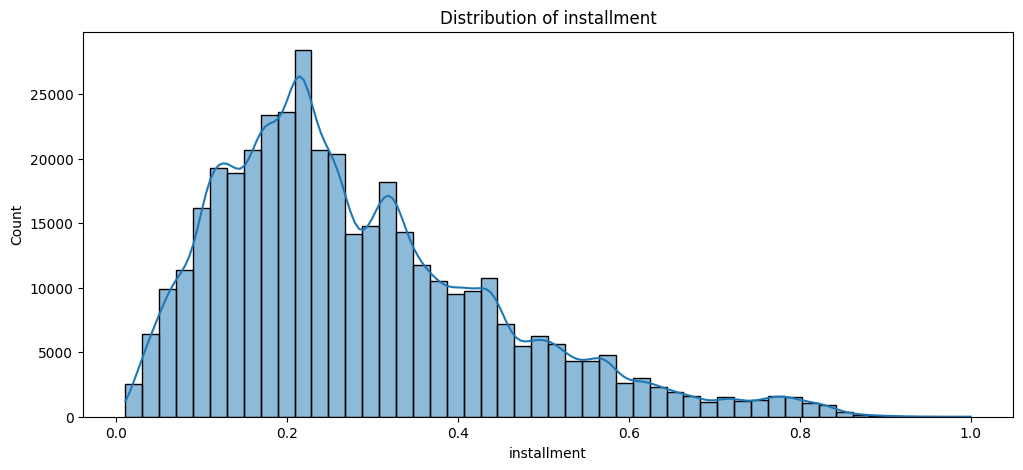

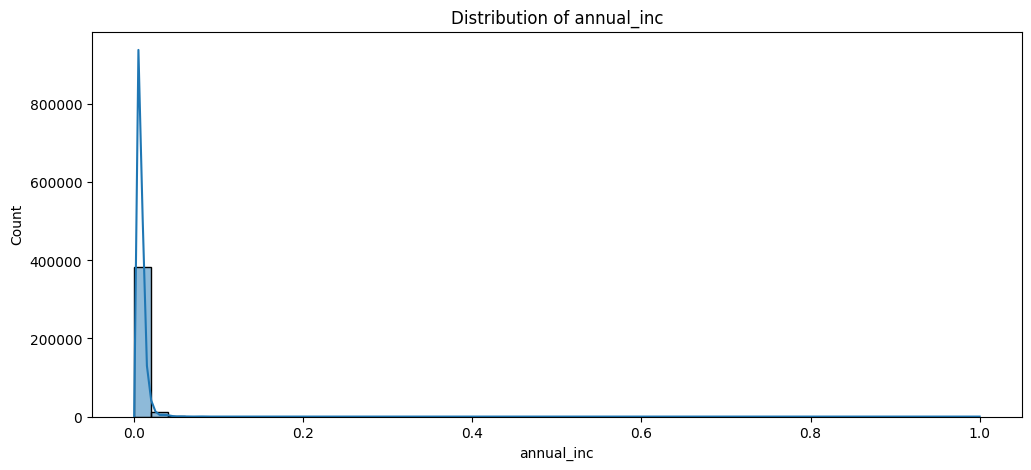

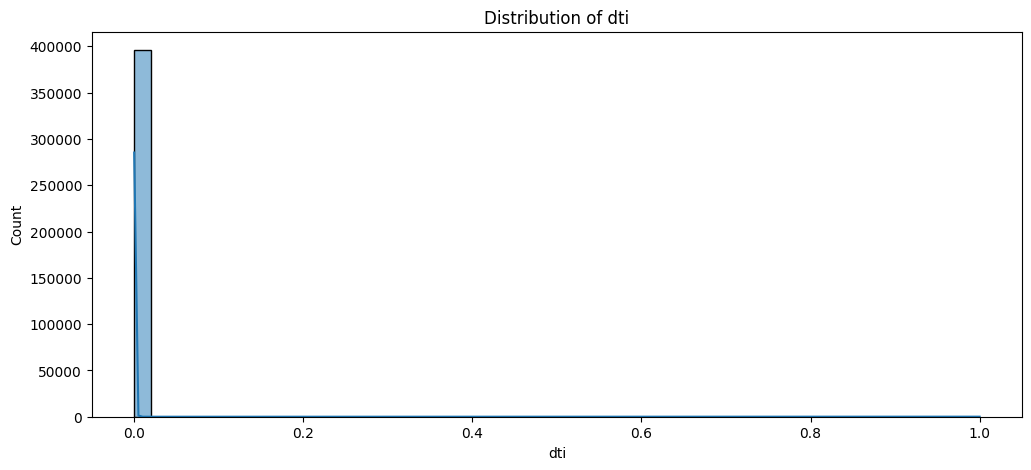

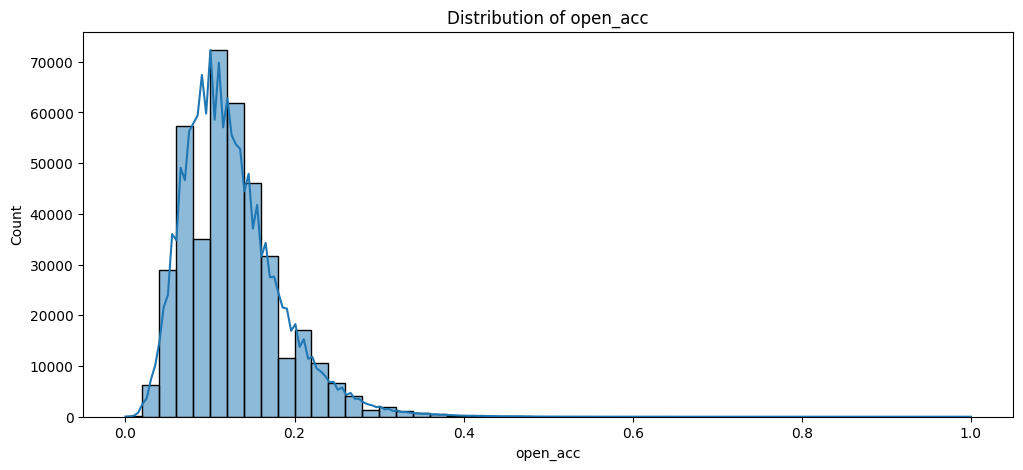

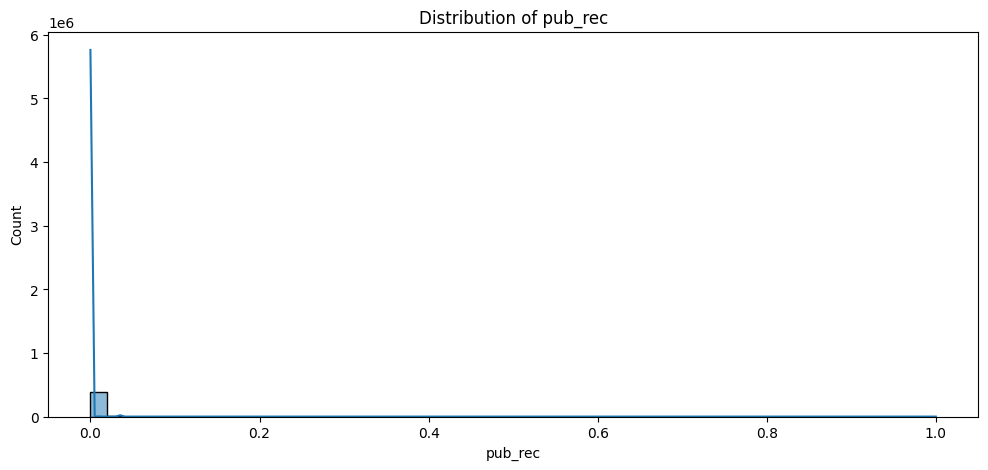

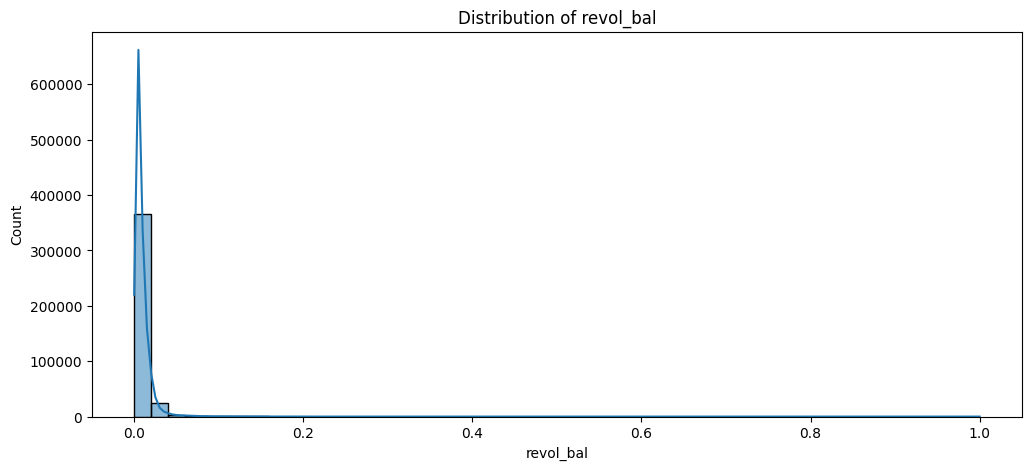

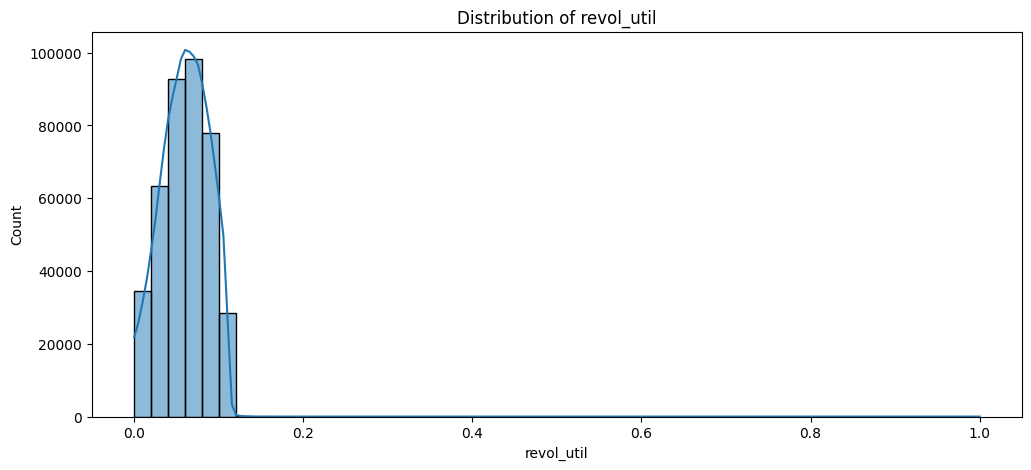

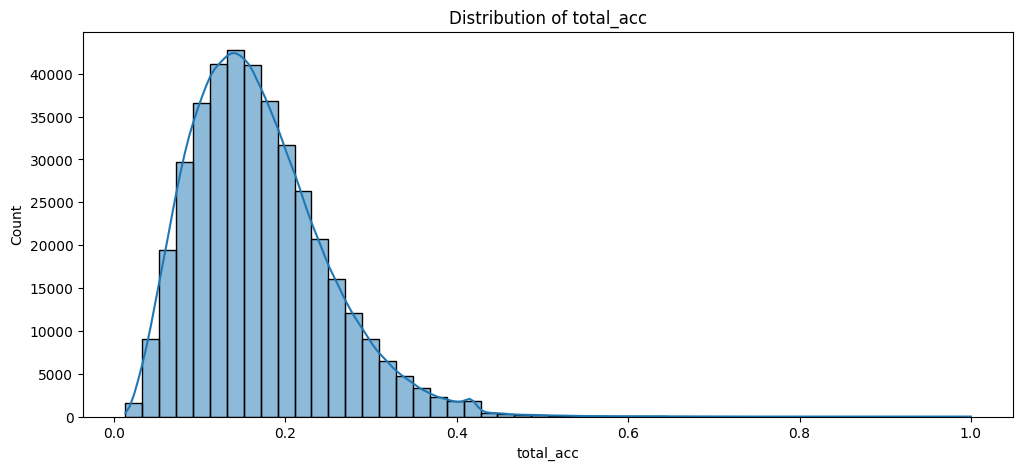

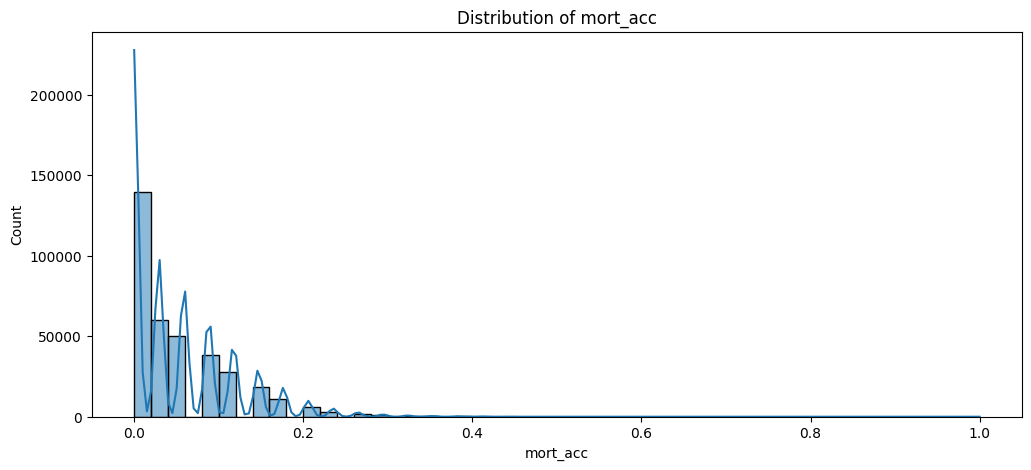

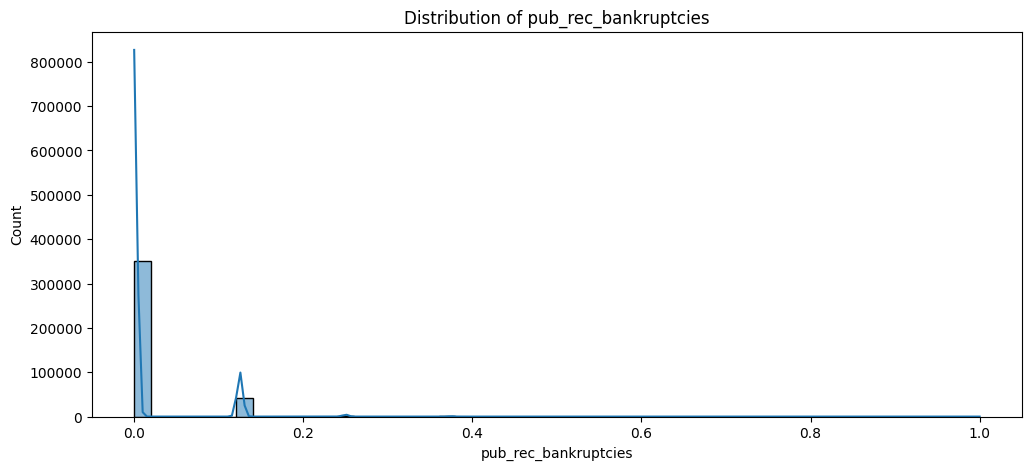

In [ ]:
for i in num_col:
    plt.figure(figsize=(12,5))
    plt.title("Distribution of {}".format(i))
    sns.histplot(df[i]/df[i].max(), kde=True, bins=50)
    plt.show()

## from the Univariant analysis it indicates that data is highly skewed which may cantain outlier

In [ ]:
cat_vars = ['home_ownership', 'verification_status', 'loan_status', 'application_type', 'grade', 'sub_grade', 'term']

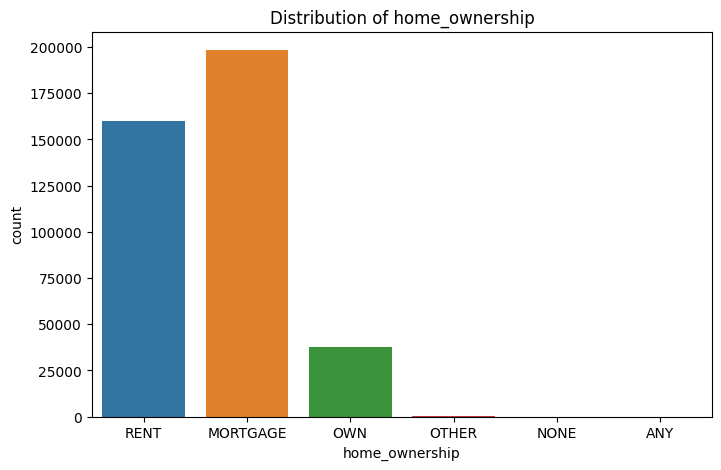

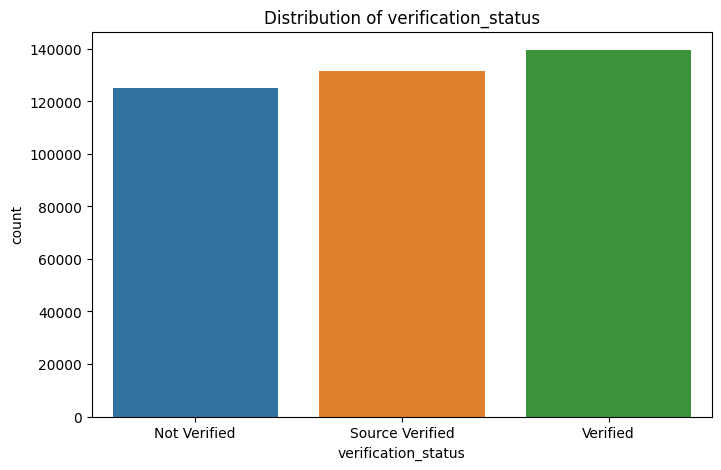

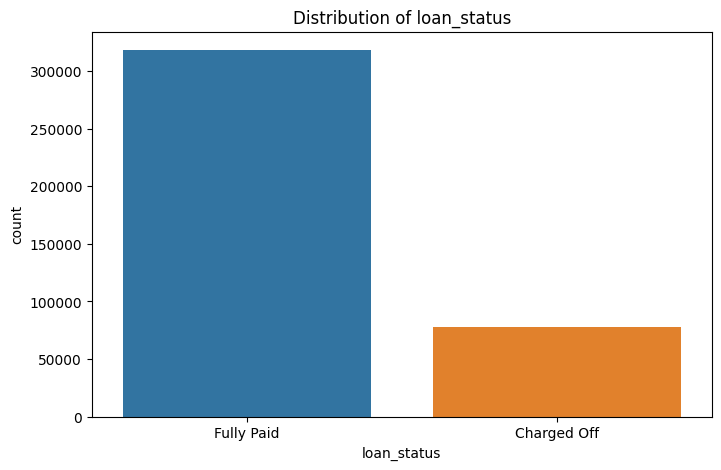

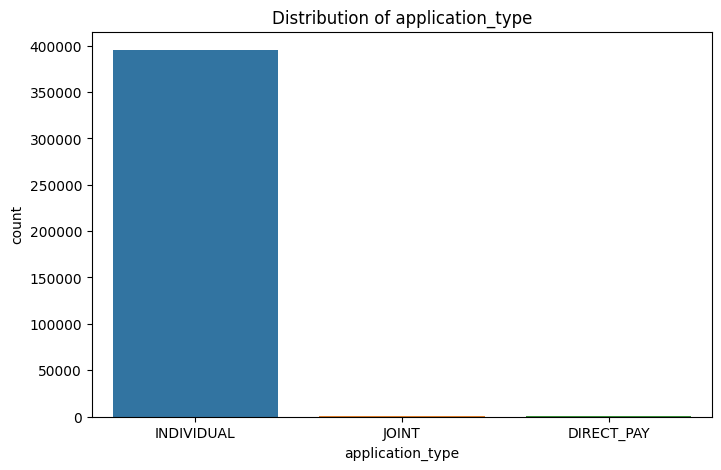

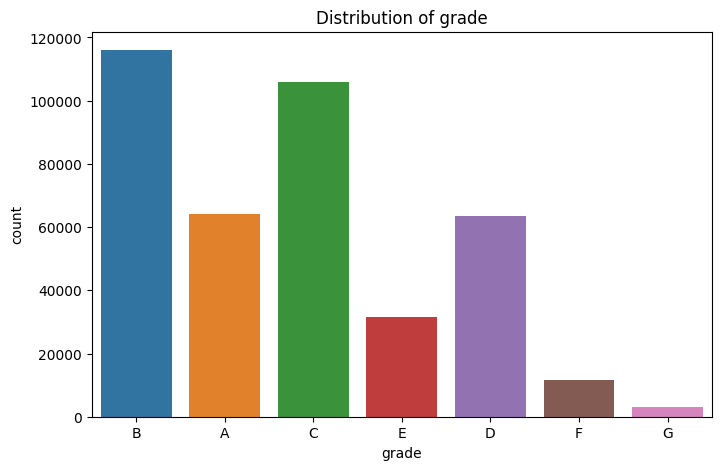

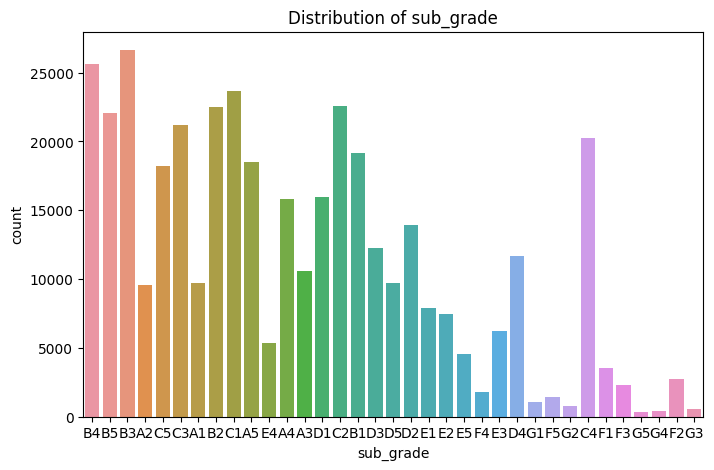

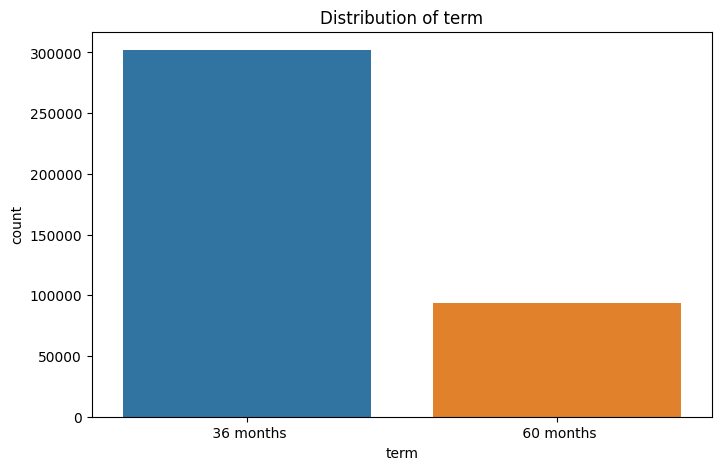

In [ ]:
for i in cat_vars:
  plt.figure(figsize=(8,5))
  plt.title("Distribution of {}".format(i))
  sns.countplot(data = df, x = i)
  plt.show()

## All the applicants are from individual type
## Most of the loan tenure is of 36 month
## Grade of majority people who have taken Grade B loan has subgare of B3
## so the people from Garde B and Sub_Grade B3 are more likley to pay loan fully

# Bivariant Analysis

In [ ]:
cat_vars

['home_ownership',
 'verification_status',
 'loan_status',
 'application_type',
 'grade',
 'sub_grade',
 'term']

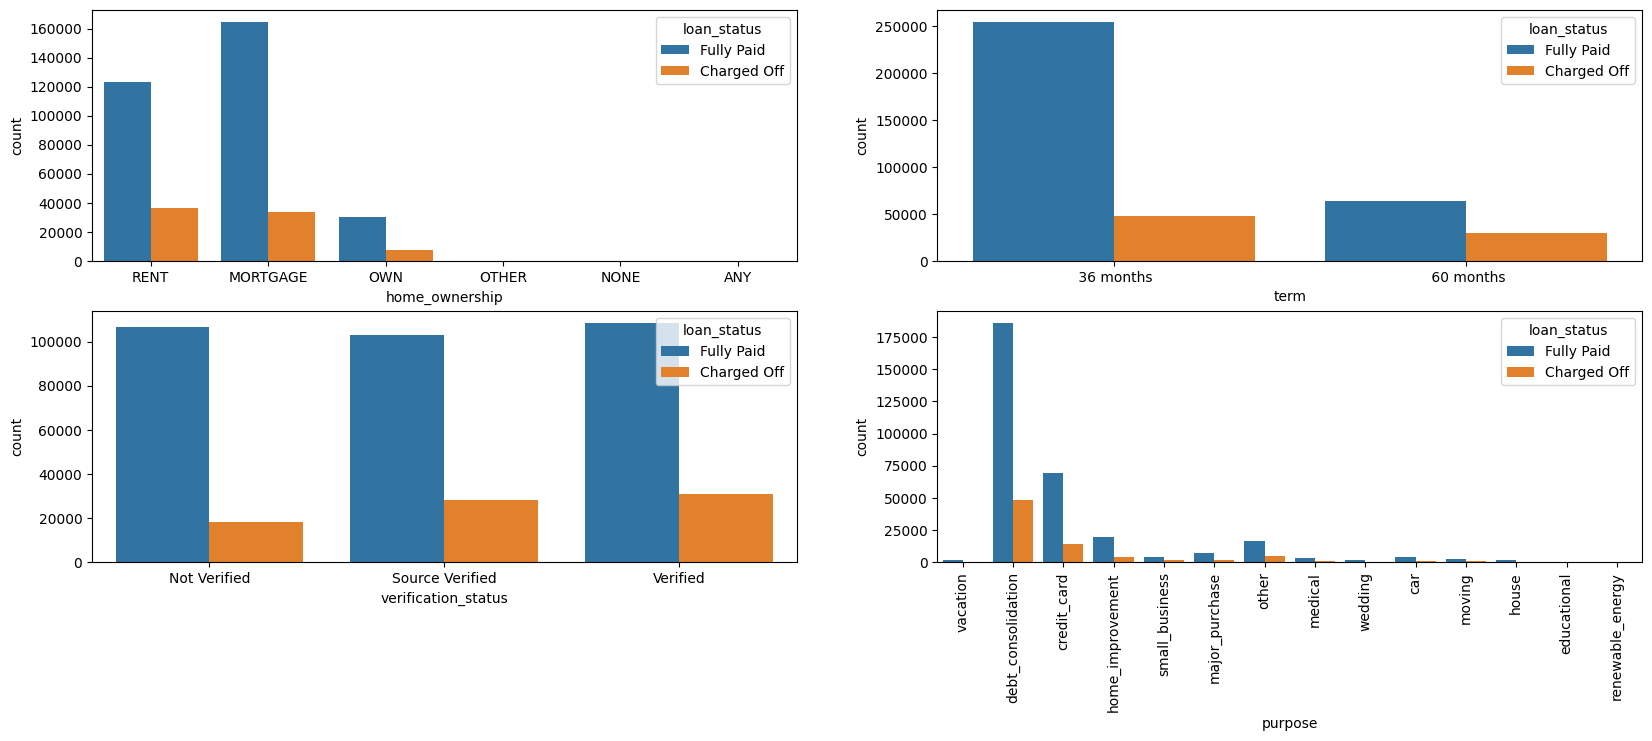

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(4,2,1)
sns.countplot(x = "home_ownership", data = df, hue = "loan_status")

plt.subplot(4,2,2)
sns.countplot(x = "term", data = df, hue = "loan_status")

plt.subplot(4,2,3)
sns.countplot(x = "verification_status", data = df, hue = "loan_status")

plt.subplot(4,2,4)
sns.countplot(x = "purpose", data = df, hue = "loan_status")
plt.xticks(rotation=90)
plt.show()

# Most of the people took loan for 36 months and full paid on time
# Most of people have home ownership as mortgage and rent
#Most of the people took loan for debt consolidations

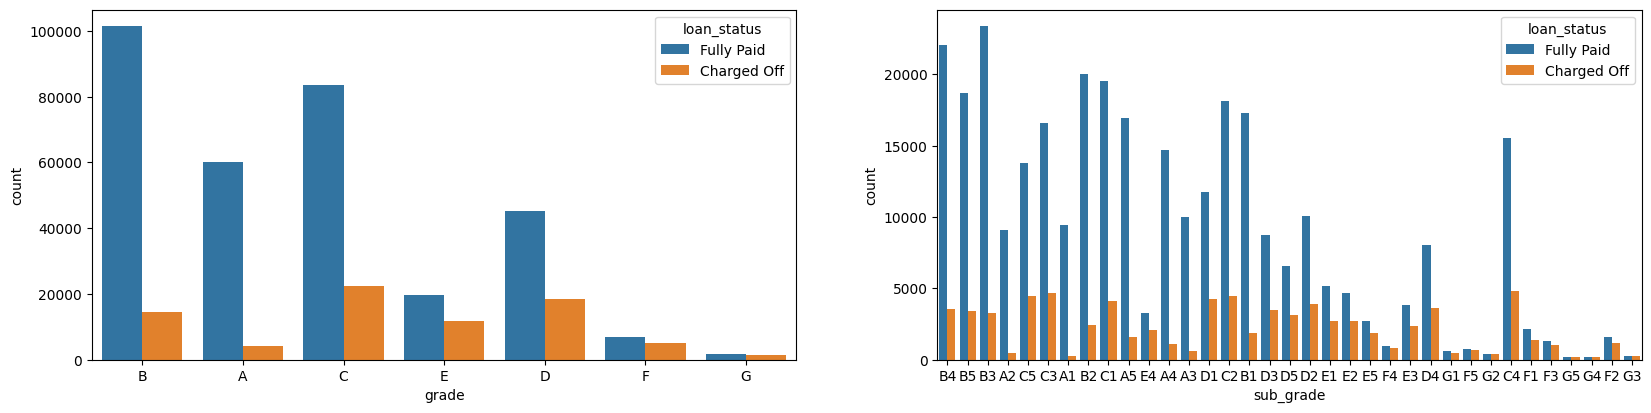

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x = "grade", data = df, hue = "loan_status")

plt.subplot(2,2,2)
sns.countplot(x = "sub_grade", data = df, hue = "loan_status")
plt.show()

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
x1 = [ "<1 year",'1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]

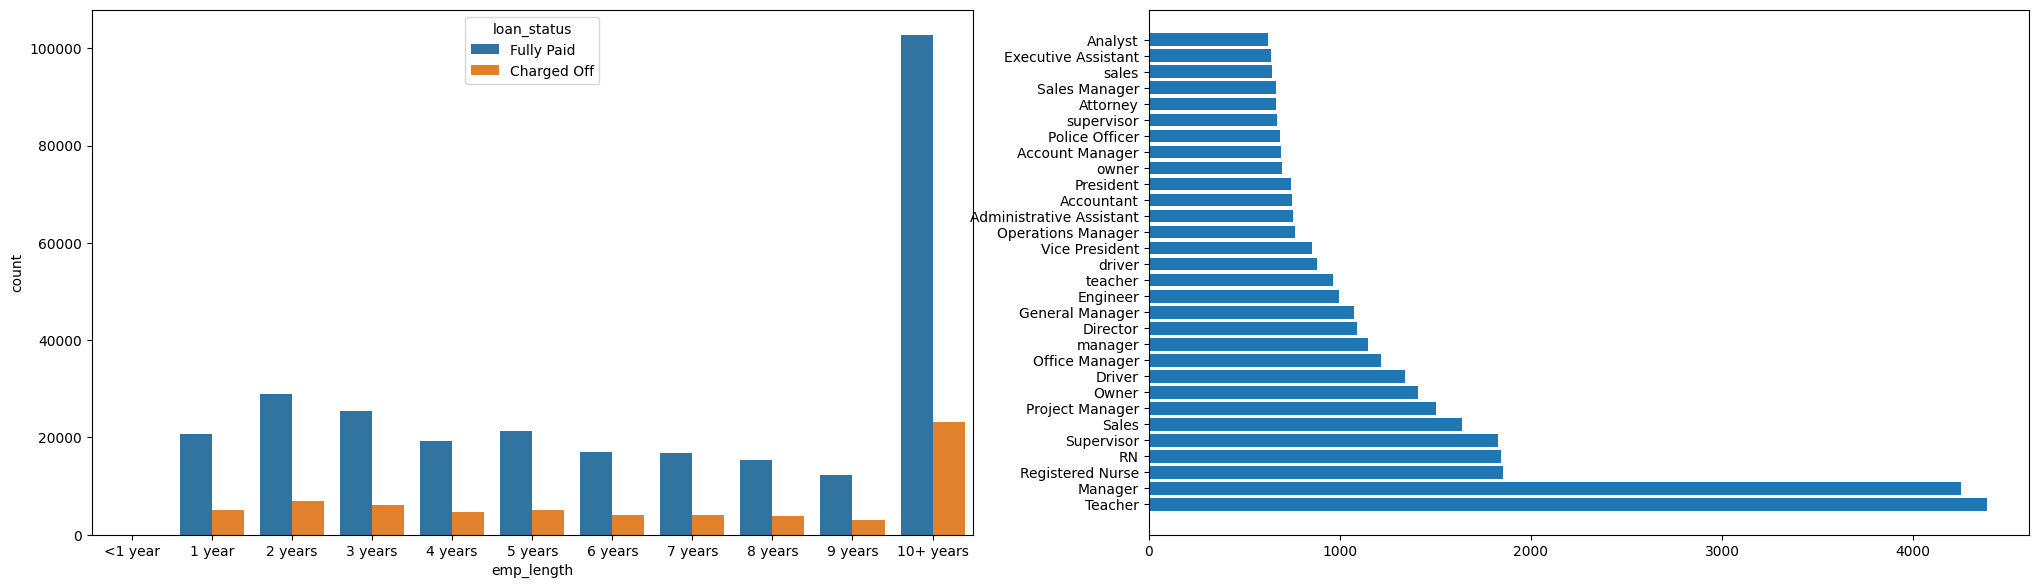

In [ ]:
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.countplot(x = "emp_length", data = df, hue = "loan_status", order = x1)
plt.subplot(2,2,2)
plt.barh(df["emp_title"].value_counts()[:30].index,df["emp_title"].value_counts()[:30])
plt.show()

# Managers and Teachers are most offorded loan on title
# Person who employed for more than 10 years has succ

<ipython-input-21-3bb337ae2faa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


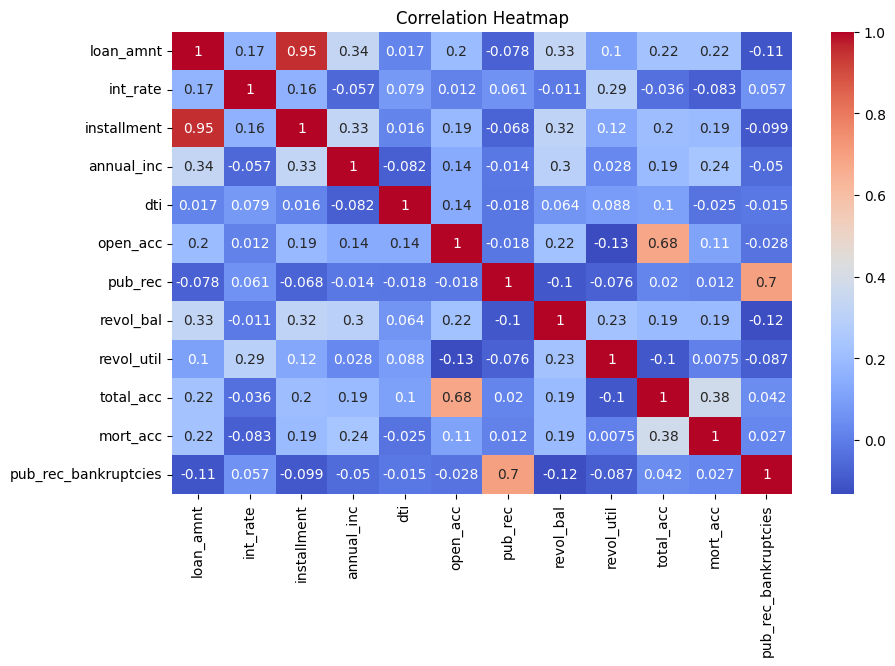

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# According to heat map most perfect correlated features are instalment and laon amount so we need to drop either one of the feature

In [ ]:
df.drop("installment", axis = 1)

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


# Data Processing

# Feature Engineering

In [ ]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1

def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number


def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number


In [ ]:
df['pub_rec']=df.pub_rec.apply(pub_rec)
df['mort_acc']=df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

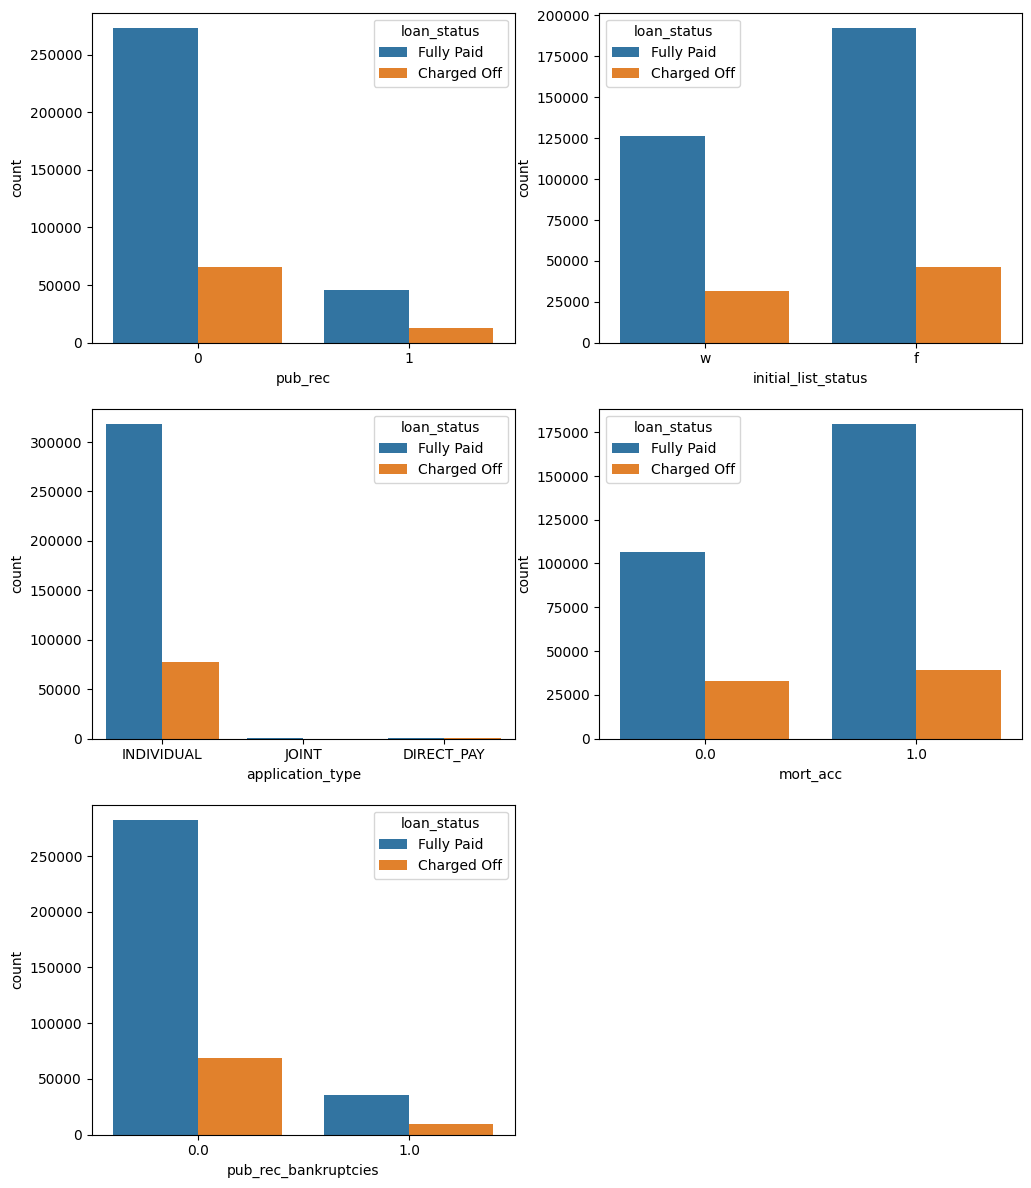

In [ ]:
plt.figure(figsize=(12,30))

plt.subplot(6,2,1)
sns.countplot(x='pub_rec',data=df,hue='loan_status')

plt.subplot(6,2,2)
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

plt.subplot(6,2,3)
sns.countplot(x='application_type',data=df,hue='loan_status')

plt.subplot(6,2,4)
sns.countplot(x='mort_acc',data=df,hue='loan_status')

plt.subplot(6,2,5)
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status')

plt.show()


# Most of the loan distribution to the people who do not hold bankrupties and paid full Amount

# Duplicate value check

In [ ]:
df.duplicated().sum()

0

# As there is no duplicat values in the data set

# Missing Value

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
df.groupby(by='total_acc').mean()
total_acc_avg=df.groupby(by='total_acc').mean().mort_acc
# saving mean of mort_acc according to total_acc_avg
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

<ipython-input-28-438440a011a8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='total_acc').mean()
<ipython-input-28-438440a011a8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_acc_avg=df.groupby(by='total_acc').mean().mort_acc


In [ ]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
df.dropna(inplace = True)
df.shape

(370622, 27)

In [ ]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

# Outlier Detection

In [ ]:
num_data = df.select_dtypes(include = "number")
num_col = num_data.columns

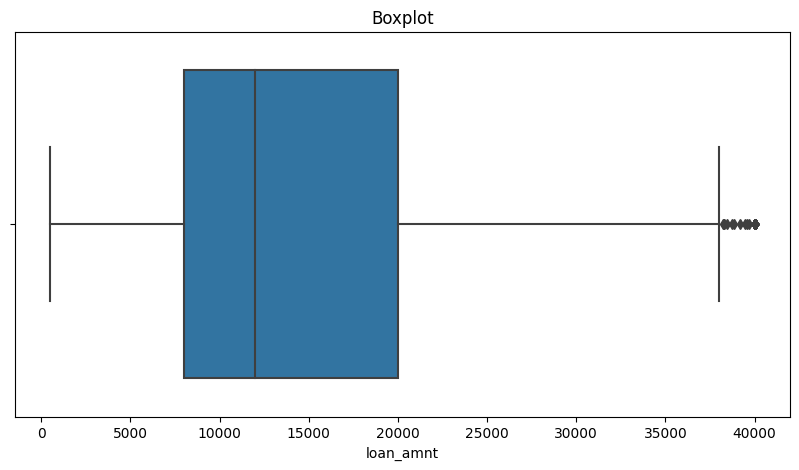

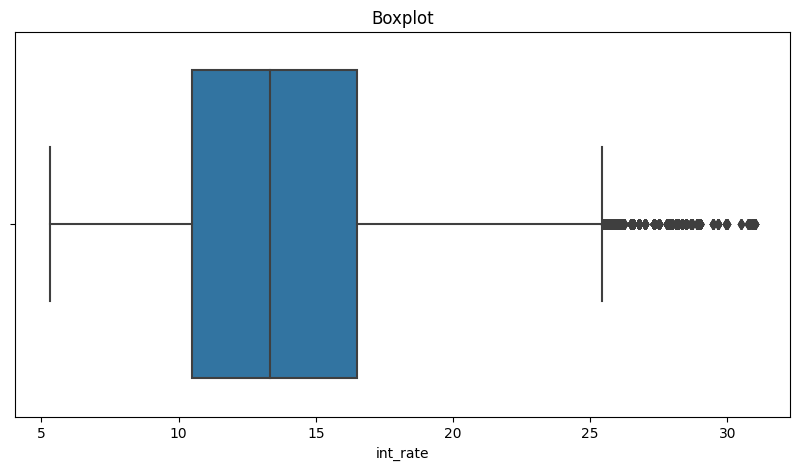

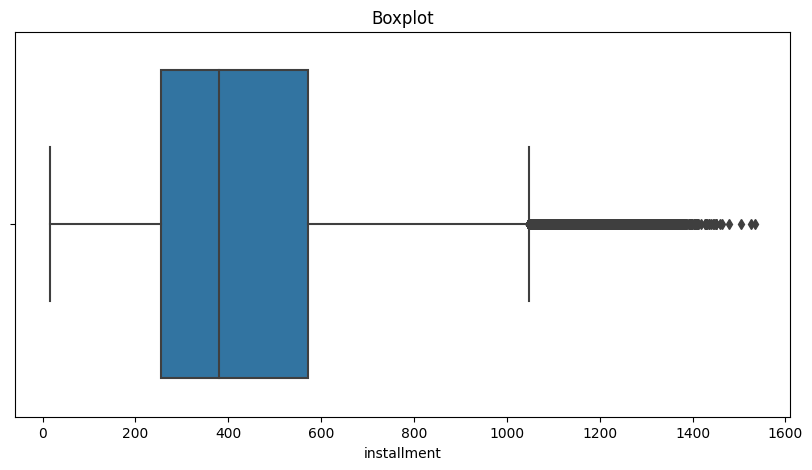

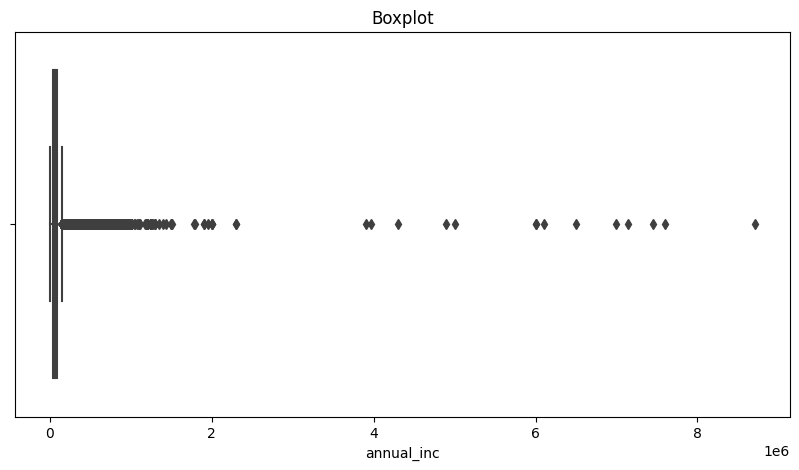

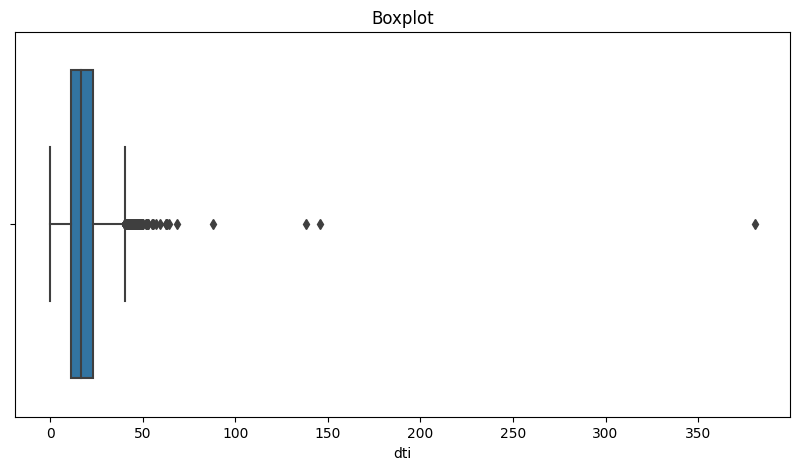

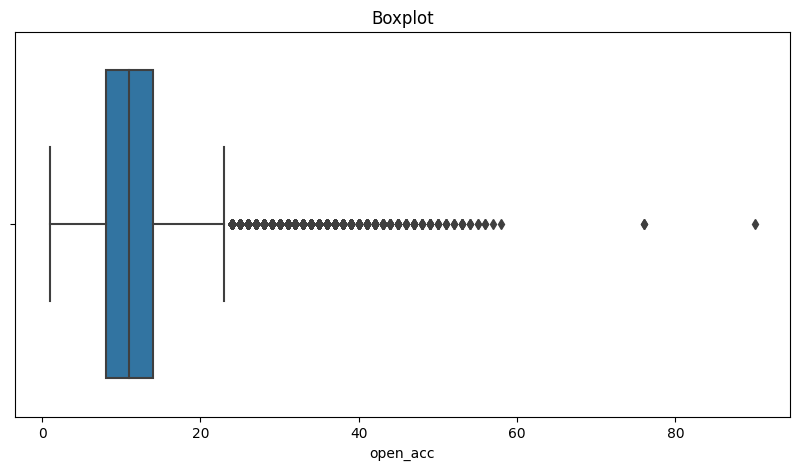

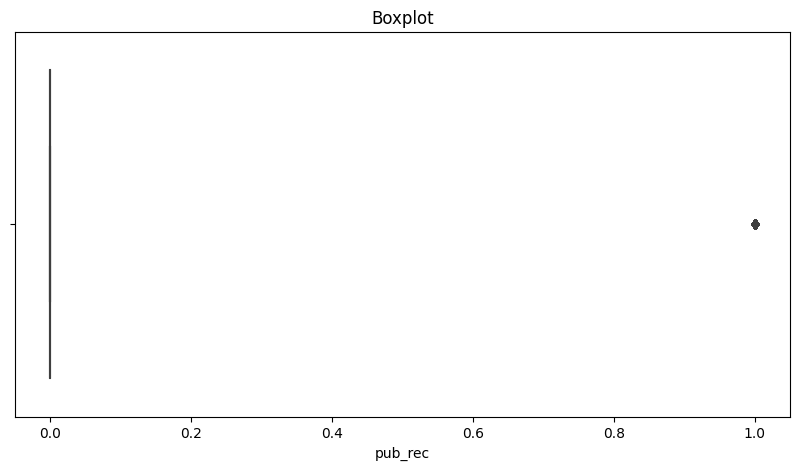

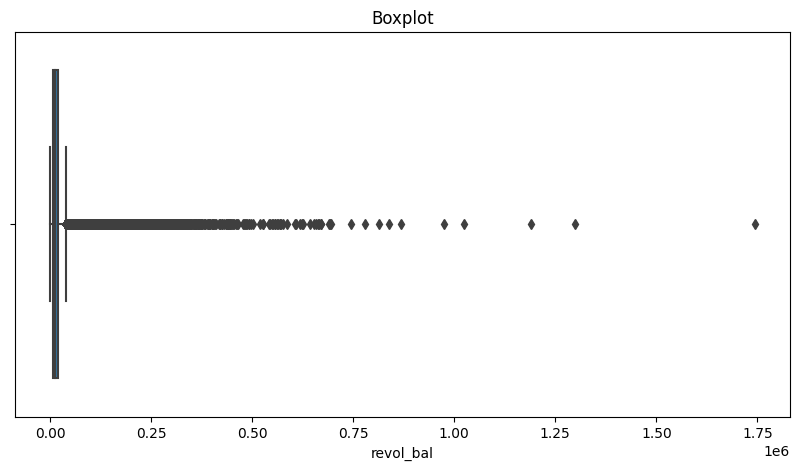

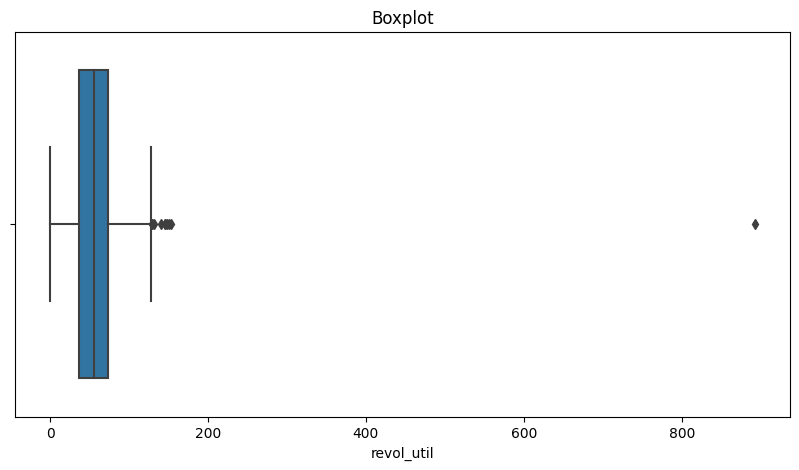

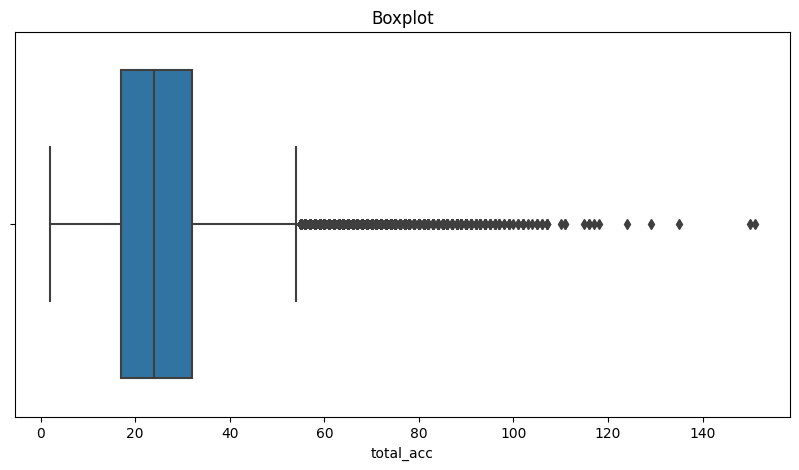

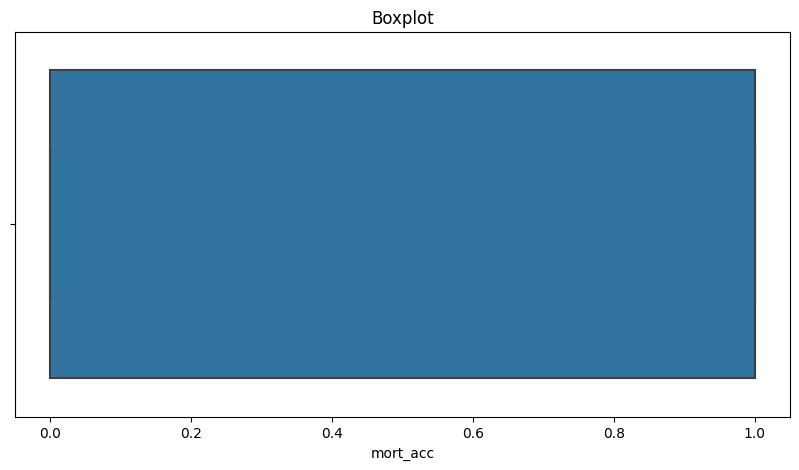

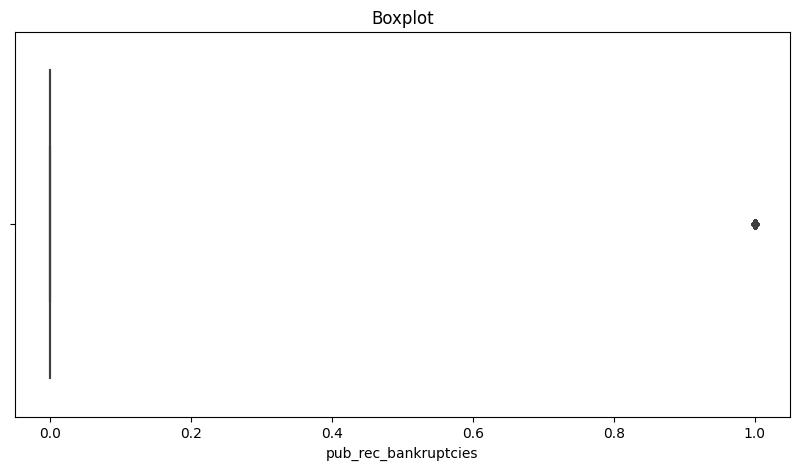

In [ ]:
for i in num_col:
  plt.figure(figsize=(10,5))
  sns.boxplot(x = df[i])
  plt.title("Boxplot")
  plt.show()


# Outlier Treatment

In [ ]:
for i in num_col:
    mean=df[i].mean()
    std=df[i].std()

    upper_limit=mean+3*std
    lower_limit=mean-3*std

    df=df[(df[i]<upper_limit) & (df[i]>lower_limit)]

df.shape


(350358, 27)

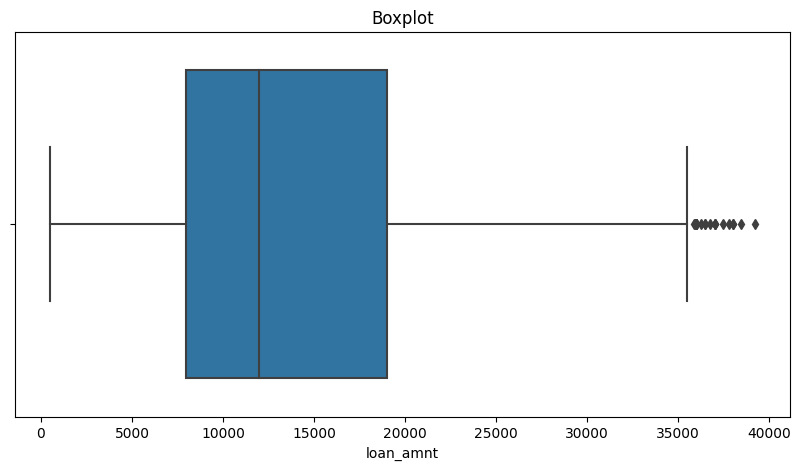

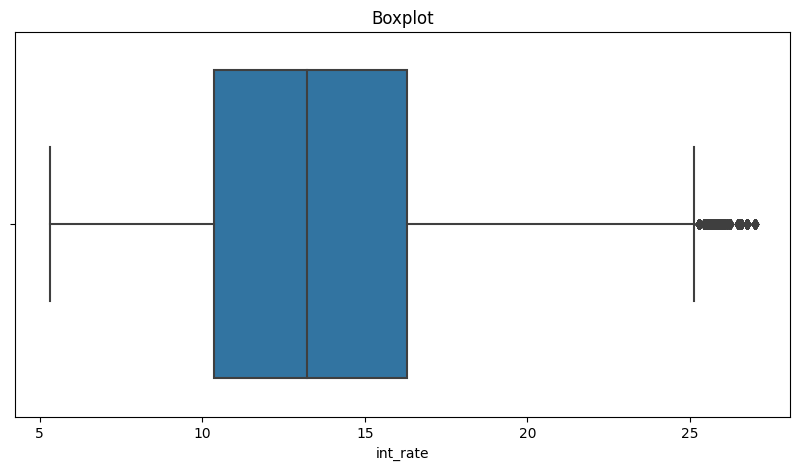

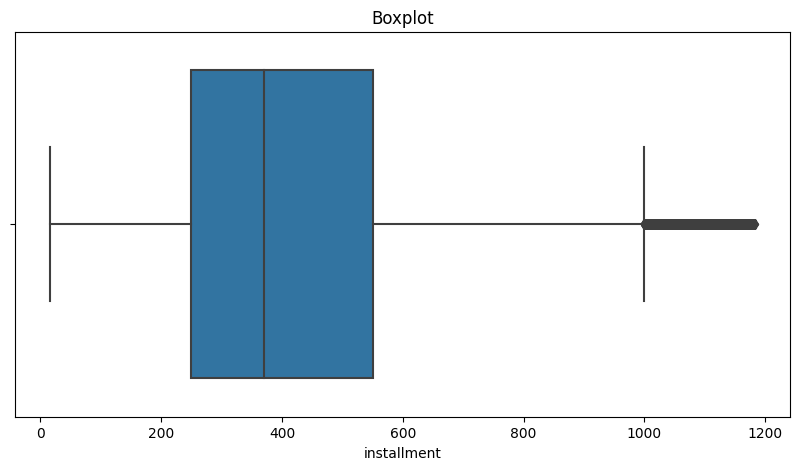

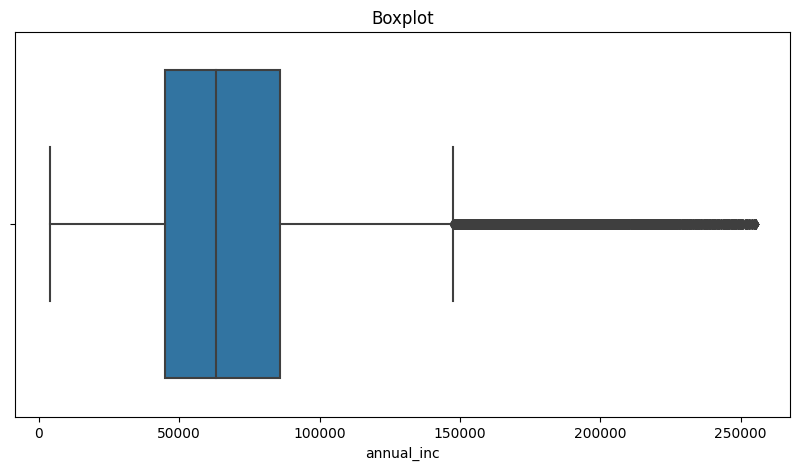

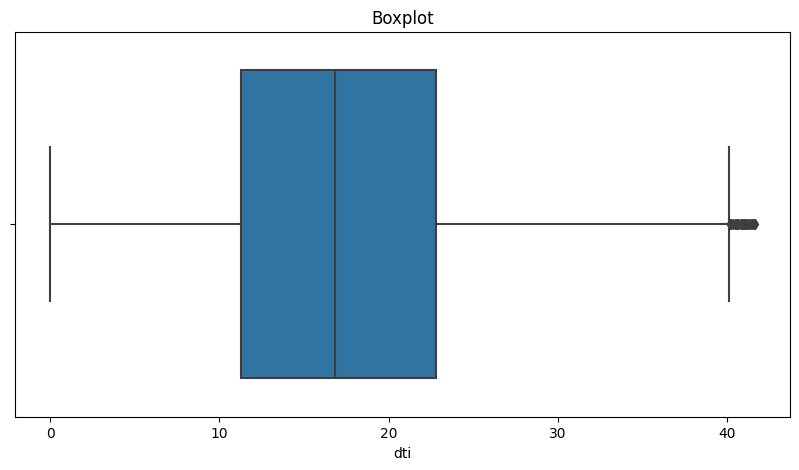

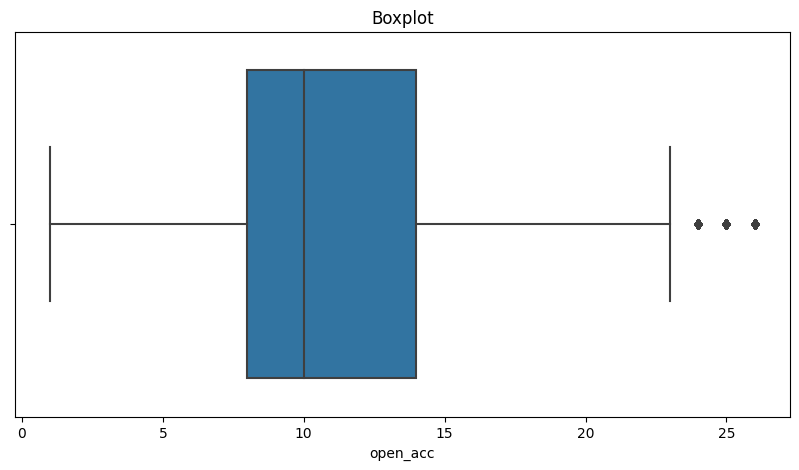

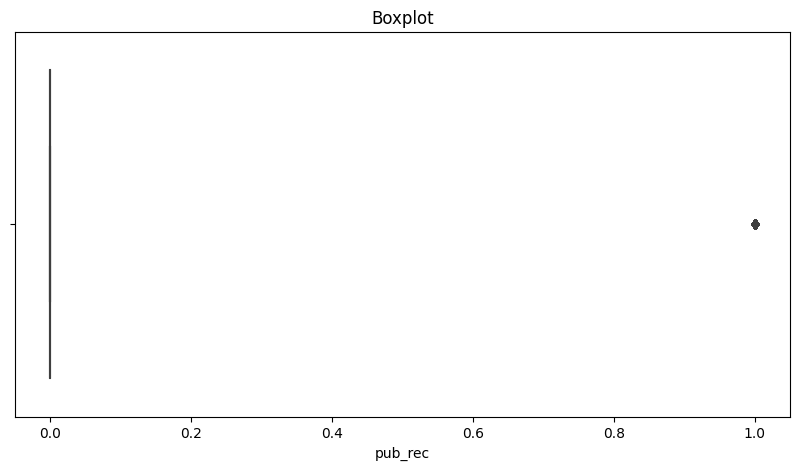

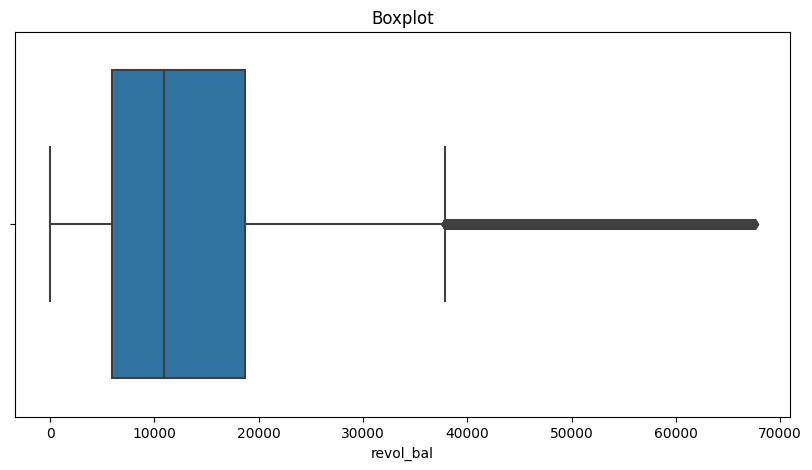

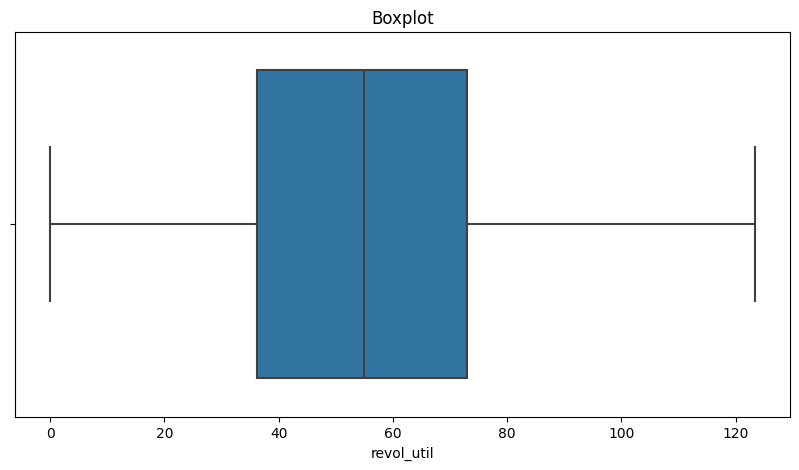

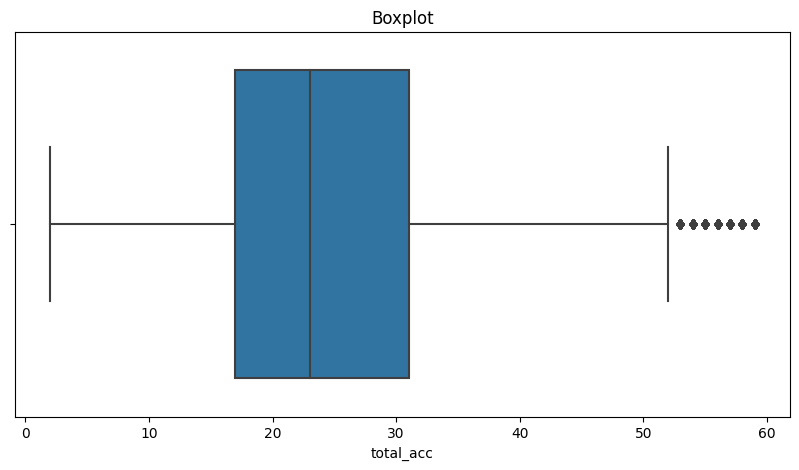

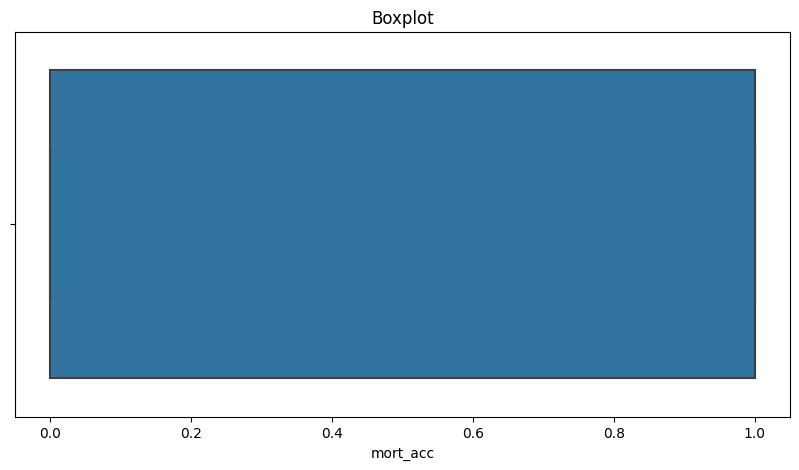

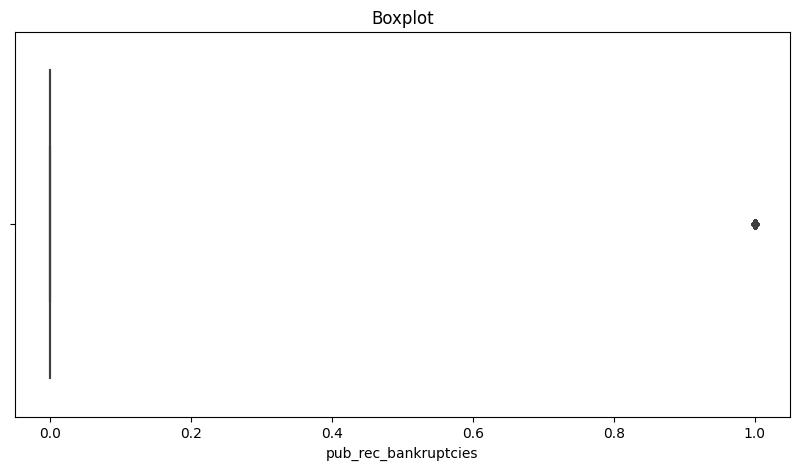

In [ ]:
for i in num_col:
  plt.figure(figsize=(10,5))
  sns.boxplot(x = df[i])
  plt.title("Boxplot")
  plt.show()


In [ ]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

# Data Processing

In [ ]:
# Converting term values to numerical val
term_values={' 36 months': 36, ' 60 months':60}
df['term'] = df.term.map(term_values)

# Mapping the target variable
df['loan_status']=df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

# Initial List Status
df['initial_list_status'].unique()
np.array(['w', 'f'], dtype=object)
list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df.initial_list_status.map(list_status)

# Let's fetch ZIP from address and then drop the remaining details -
df['zip_code'] = df.address.apply(lambda x: x[-5:])
df['zip_code'].value_counts(normalize=True)*100

70466    14.375296
30723    14.289669
22690    14.272259
48052    14.126979
00813    11.605558
29597    11.549044
05113    11.519075
93700     2.768597
11650     2.762888
86630     2.730636
Name: zip_code, dtype: float64

In [ ]:
# Dropping some variables which we can let go for now
df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'],
                   axis=1, inplace=True)

# On Hot Encoding

In [ ]:
dummies=['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']

In [ ]:
df_encoded = pd.get_dummies(df, columns= dummies, drop_first = True)

In [ ]:
df_encoded.shape

(350358, 52)

In [ ]:
df_encoded.isna().sum()

loan_amnt                              0
term                                   0
int_rate                               0
installment                            0
annual_inc                             0
loan_status                            0
dti                                    0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
initial_list_status                    0
mort_acc                               0
pub_rec_bankruptcies                   0
purpose_credit_card                    0
purpose_debt_consolidation             0
purpose_educational                    0
purpose_home_improvement               0
purpose_house                          0
purpose_major_purchase                 0
purpose_medical                        0
purpose_moving                         0
purpose_other                          0
purpose_renewabl

# Data Preparation for Modeling

In [ ]:
X = df_encoded.drop("loan_status", axis = 1)
y = df_encoded["loan_status"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(245250, 51)
(105108, 51)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scaling the data set

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(model.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.890


## Model Coefficient

In [ ]:
coefs_1 = model.coef_.tolist()[0]
coefs_1_df = pd.DataFrame({"Variables":X.columns, "Cofficient":coefs_1})
coefs_1_df

,Variables,Cofficient
0,loan_amnt,-0.333277
1,term,0.557124
2,int_rate,0.083620
3,installment,0.850129
4,annual_inc,-1.338832
5,dti,0.958930
6,open_acc,0.667112
7,pub_rec,0.152247
8,revol_bal,-0.327721
9,revol_util,0.452809


## Confusion matrix

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [ ]:
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[84154   525]
 [10994  9435]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94     84679
           1       0.95      0.46      0.62     20429

    accuracy                           0.89    105108
   macro avg       0.92      0.73      0.78    105108
weighted avg       0.90      0.89      0.87    105108



# ROC Curv

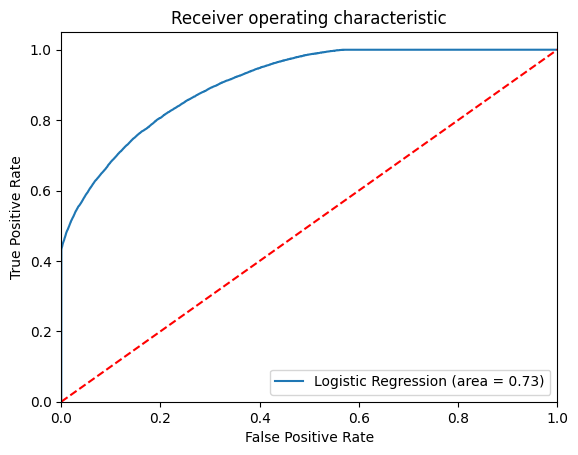

In [ ]:
model_roc_auc=roc_auc_score(y_test,model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#Insights

## ROC-AUC curve is grossing the area near about 0.73 which indicates that model is performing well.
## There is still room for some model improvement By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.

## Precission_recall_curve

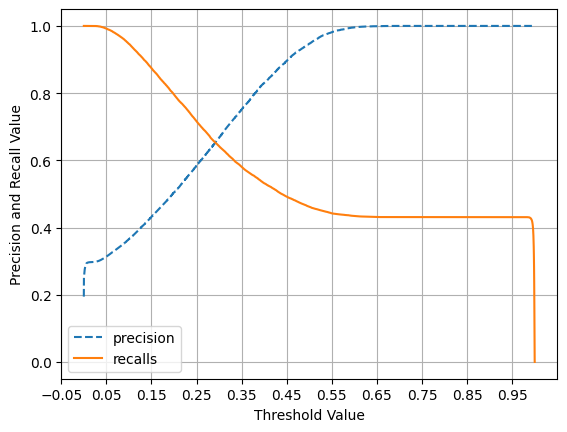

In [ ]:
def precission_recall_curve_plot(y_test,y_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test,y_proba)

    threshold_boundary = thresholds.shape[0]
    #plot precision
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    #plot recall
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recalls')

    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precission_recall_curve_plot(y_test,model.predict_proba(X_test)[:,1])

## Insights

## Precision score is highest at 0.55 threshold. High precision value indicates that model is positevly predicating the charged off loan status which helps business to take more stable decision.
## Recall score is higher on smaller threshold but after 0.55 the recall value is constant. Model is correctly classifying the actual predicated values as instances.

## Oversampling Using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state = 42)
X_train_res,y_train_res = sm.fit_resample(X_train,y_train.ravel())

In [ ]:
print("After oversampling theshape of the X_train: {}".format(X_train_res.shape))
print("After oversampling theshape of the y_train: {}".format(y_train_res.shape))

After oversampling theshape of the X_train: (396740, 51)
After oversampling theshape of the y_train: (396740,)


In [ ]:
print("After oversampling theshape of the X_train: {}".format(sum(y_train_res == 1)))
print("After oversampling theshape of the y_train: {}".format(sum(y_train_res == 0)))

After oversampling theshape of the X_train: 198370
After oversampling theshape of the y_train: 198370


## Model Traning after Oversampling

In [ ]:
model_after_oversampling = LogisticRegression(max_iter = 1000)
model_after_oversampling.fit(X_train_res,y_train_res)
y_over_samp_pred = model_after_oversampling.predict(X_test)

In [ ]:
print(classification_report(y_test,y_over_samp_pred))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     84679
           1       0.49      0.81      0.61     20429

    accuracy                           0.80    105108
   macro avg       0.72      0.80      0.74    105108
weighted avg       0.86      0.80      0.82    105108



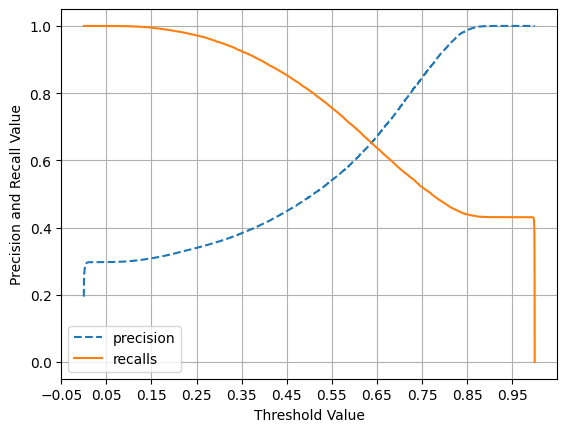

In [ ]:
def precission_recall_curve_plot(y_test,y_proba):
    precisions, recalls, thresholds = precision_recall_curve(y_test,y_proba)

    threshold_boundary = thresholds.shape[0]
    #plot precision
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    #plot recall
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recalls')

    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precission_recall_curve_plot(y_test,model_after_oversampling.predict_proba(X_test)[:,1])

## Insights

## After balancing the dataset, there is significant change observed in the precion and recall score for both of the classes.
## Precision score is .95 and .49 for full paid and charged off respectively.####

## Tradeoff Questions

(1) How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

  Answer:- Since data is imbalances by making the data balance we can try to avoid false positives.because we don't want to make false positive prediction and at the same we want to detect the defualers.

(2) Since NPA (non-performing asset) is a real problem in this industry, its important we play safe and shouldnt disburse loans to anyone.
  Answer :- Below are some Inportant feature while making prediction so this will help the manager to identify who are the customers more likely to pay loan ammount fully.

In [ ]:
coefs = model_after_oversampling.coef_.tolist()[0]

In [ ]:
coefs_df = pd.DataFrame({"Variable": X.columns, "Coefficient":coefs})
coefs_df

,Variable,Coefficient
0,loan_amnt,0.249399
1,term,0.506148
2,int_rate,0.406163
3,installment,0.413363
4,annual_inc,-1.806210
5,dti,1.030476
6,open_acc,0.908694
7,pub_rec,-0.103593
8,revol_bal,-0.614496
9,revol_util,0.686841


## Actional Insights and Recommendations

## (1) 80% of the customers have paid the loan fully.
## (2) 20% of the customers are the defaulters.
## (3) The organization can the trained model to make prediction for whether a person will likely to pay the loan amount or he will be a defaulter.
## (4) model is performing the decent job. We can trust this model for unseen data
## (5) By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.
## (6) ROC AUC curve area of 0.73, the model is correctly classifying about 73% of the instances. This is a good performance, but there is still requirment for improvement.
## (7) Model achieves the 94% f1-score for the negative class (Fully Paid).
## (8) Model achieves the 62% f1-score for the positive class (Charged off).
## (9) The precision-recall curve allows us to see how the precision and recall trade-off as we vary the threshold. A higher threshold will result in higher precision, but lower recall, and vice versa.
## (10) After balancing the dataset, there is significant change observed in the precion and recall score for both of the classes.
## (11) Accuracy of Logistic Regression Classifier on test set: 0.891 which is decent and not by chance.